In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

Using TensorFlow backend.


# Erzeugung der Datensätze 

In [3]:
def intToBits(x,l):
    return np.array(list([1 if x & (1<<i) > 0 else 0 for i in range(l)]))

In [46]:
# 8-Bit können in binär alle Zahlen zwischen 0 und 255 darstellen. 
# Wir wollen daher 2*1000 zufällige Integer zwischen 0 und 255 für die Trainingsmenge: 
pre_x = np.random.randint(0,255,(1000,2))

# Wir benötigen die Summe zur Berechnung der gewünschten Netzwerkausgabe:
pre_y = np.sum(pre_x,axis=1)
               
#Konvertiere den Training-Datensatz von Interger zu Binärdastellung              
xs = np.array([np.column_stack((intToBits(x[0],8),intToBits(x[1],8))) for x in pre_x])
ys = np.array([intToBits(y,9) for y in pre_y])

Eine Datenprobe 

In [104]:
print("input: ") #für jeden Input werden zwei Binärzahlen in einem Zeitschritt ins RNN gefüttert
print(xs[0])
print("ouput: ", ys[0,:8])

input: 
[[1 0]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]]
ouput:  [1 1 0 1 1 1 1 1]


In [48]:
#Erzeuge den Test-Datensatz in Binärdarstellung
pretest_x = np.random.randint(0,255,(1000,2))
pretest_y = np.sum(pretest_x,axis=1)
testxs = np.array([np.column_stack((intToBits(x[0],8),intToBits(x[1],8))) for x in pretest_x])
testys = np.array([intToBits(y,9) for y in pretest_y])

# Erzeugung des RNNs
das RNN hat eine "recurrent" Schicht, die 6 Units erhält

In [140]:
model = Sequential()
model.add(SimpleRNN(units=6, input_shape=(8,2), activation="tanh", kernel_initializer='uniform'))
model.add(Dense(9, activation="hard_sigmoid", kernel_initializer='uniform')) 

model.compile(optimizer='adam',
              loss='mse', 
              metrics=['accuracy'])

# Training

In [141]:
rnn = model.fit(xs, ys, batch_size=50, epochs=1000, validation_data = (testxs, testys))

Train on 1000 samples, validate on 1000 samples
Epoch 1/1000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2500 - accuracy: 0.0450 - val_loss: 0.2500 - val_accuracy: 0.0450
Epoch 2/1000
1000/1000 [==============================] - 0s 119us/step - loss: 0.2500 - accuracy: 0.0550 - val_loss: 0.2500 - val_accuracy: 0.0720
Epoch 3/1000
1000/1000 [==============================] - 0s 119us/step - loss: 0.2499 - accuracy: 0.0820 - val_loss: 0.2500 - val_accuracy: 0.0840
Epoch 4/1000
1000/1000 [==============================] - 0s 119us/step - loss: 0.2499 - accuracy: 0.1360 - val_loss: 0.2500 - val_accuracy: 0.1250
Epoch 5/1000
1000/1000 [==============================] - 0s 124us/step - loss: 0.2498 - accuracy: 0.1320 - val_loss: 0.2499 - val_accuracy: 0.1070
Epoch 6/1000
1000/1000 [==============================] - 0s 122us/step - loss: 0.2497 - accuracy: 0.1380 - val_loss: 0.2499 - val_accuracy: 0.1170
Epoch 7/1000
1000/1000 [==============================] - 0s 114us

Epoch 56/1000
1000/1000 [==============================] - 0s 115us/step - loss: 0.2268 - accuracy: 0.1120 - val_loss: 0.2270 - val_accuracy: 0.0890
Epoch 57/1000
1000/1000 [==============================] - 0s 126us/step - loss: 0.2266 - accuracy: 0.1110 - val_loss: 0.2268 - val_accuracy: 0.0910
Epoch 58/1000
1000/1000 [==============================] - 0s 129us/step - loss: 0.2264 - accuracy: 0.1070 - val_loss: 0.2266 - val_accuracy: 0.0920
Epoch 59/1000
1000/1000 [==============================] - 0s 135us/step - loss: 0.2262 - accuracy: 0.1120 - val_loss: 0.2263 - val_accuracy: 0.0940
Epoch 60/1000
1000/1000 [==============================] - 0s 130us/step - loss: 0.2260 - accuracy: 0.1110 - val_loss: 0.2261 - val_accuracy: 0.0940
Epoch 61/1000
1000/1000 [==============================] - 0s 120us/step - loss: 0.2258 - accuracy: 0.1140 - val_loss: 0.2260 - val_accuracy: 0.0990
Epoch 62/1000
1000/1000 [==============================] - 0s 125us/step - loss: 0.2256 - accuracy: 0.1140

Epoch 111/1000
1000/1000 [==============================] - 0s 109us/step - loss: 0.1970 - accuracy: 0.4070 - val_loss: 0.1974 - val_accuracy: 0.4150
Epoch 112/1000
1000/1000 [==============================] - 0s 111us/step - loss: 0.1968 - accuracy: 0.4090 - val_loss: 0.1972 - val_accuracy: 0.4320
Epoch 113/1000
1000/1000 [==============================] - 0s 111us/step - loss: 0.1965 - accuracy: 0.4150 - val_loss: 0.1970 - val_accuracy: 0.4160
Epoch 114/1000
1000/1000 [==============================] - 0s 108us/step - loss: 0.1962 - accuracy: 0.4180 - val_loss: 0.1966 - val_accuracy: 0.4240
Epoch 115/1000
1000/1000 [==============================] - 0s 110us/step - loss: 0.1959 - accuracy: 0.4220 - val_loss: 0.1964 - val_accuracy: 0.4320
Epoch 116/1000
1000/1000 [==============================] - 0s 116us/step - loss: 0.1957 - accuracy: 0.4190 - val_loss: 0.1961 - val_accuracy: 0.4270
Epoch 117/1000
1000/1000 [==============================] - 0s 109us/step - loss: 0.1953 - accuracy:

Epoch 220/1000
1000/1000 [==============================] - 0s 132us/step - loss: 0.1672 - accuracy: 0.4770 - val_loss: 0.1672 - val_accuracy: 0.4640
Epoch 221/1000
1000/1000 [==============================] - 0s 123us/step - loss: 0.1669 - accuracy: 0.4830 - val_loss: 0.1671 - val_accuracy: 0.4630
Epoch 222/1000
1000/1000 [==============================] - 0s 115us/step - loss: 0.1669 - accuracy: 0.4690 - val_loss: 0.1676 - val_accuracy: 0.4650
Epoch 223/1000
1000/1000 [==============================] - 0s 123us/step - loss: 0.1667 - accuracy: 0.4960 - val_loss: 0.1665 - val_accuracy: 0.5030
Epoch 224/1000
1000/1000 [==============================] - 0s 125us/step - loss: 0.1663 - accuracy: 0.4780 - val_loss: 0.1663 - val_accuracy: 0.5090
Epoch 225/1000
1000/1000 [==============================] - 0s 121us/step - loss: 0.1659 - accuracy: 0.4900 - val_loss: 0.1659 - val_accuracy: 0.5000
Epoch 226/1000
1000/1000 [==============================] - 0s 124us/step - loss: 0.1661 - accuracy:

Epoch 329/1000
1000/1000 [==============================] - 0s 108us/step - loss: 0.1504 - accuracy: 0.4980 - val_loss: 0.1510 - val_accuracy: 0.4730
Epoch 330/1000
1000/1000 [==============================] - 0s 107us/step - loss: 0.1504 - accuracy: 0.4990 - val_loss: 0.1506 - val_accuracy: 0.4710
Epoch 331/1000
1000/1000 [==============================] - 0s 113us/step - loss: 0.1503 - accuracy: 0.4930 - val_loss: 0.1501 - val_accuracy: 0.4780
Epoch 332/1000
1000/1000 [==============================] - 0s 109us/step - loss: 0.1501 - accuracy: 0.4920 - val_loss: 0.1499 - val_accuracy: 0.4820
Epoch 333/1000
1000/1000 [==============================] - 0s 110us/step - loss: 0.1500 - accuracy: 0.4970 - val_loss: 0.1501 - val_accuracy: 0.4820
Epoch 334/1000
1000/1000 [==============================] - 0s 109us/step - loss: 0.1499 - accuracy: 0.4970 - val_loss: 0.1502 - val_accuracy: 0.5120
Epoch 335/1000
1000/1000 [==============================] - 0s 100us/step - loss: 0.1498 - accuracy:

Epoch 438/1000
1000/1000 [==============================] - 0s 104us/step - loss: 0.1415 - accuracy: 0.5500 - val_loss: 0.1410 - val_accuracy: 0.5420
Epoch 439/1000
1000/1000 [==============================] - 0s 103us/step - loss: 0.1414 - accuracy: 0.5500 - val_loss: 0.1413 - val_accuracy: 0.5270
Epoch 440/1000
1000/1000 [==============================] - 0s 100us/step - loss: 0.1418 - accuracy: 0.5470 - val_loss: 0.1418 - val_accuracy: 0.5450
Epoch 441/1000
1000/1000 [==============================] - 0s 100us/step - loss: 0.1418 - accuracy: 0.5480 - val_loss: 0.1413 - val_accuracy: 0.5810
Epoch 442/1000
1000/1000 [==============================] - 0s 102us/step - loss: 0.1412 - accuracy: 0.5530 - val_loss: 0.1414 - val_accuracy: 0.5110
Epoch 443/1000
1000/1000 [==============================] - 0s 113us/step - loss: 0.1415 - accuracy: 0.5530 - val_loss: 0.1416 - val_accuracy: 0.5180
Epoch 444/1000
1000/1000 [==============================] - 0s 104us/step - loss: 0.1411 - accuracy:

Epoch 547/1000
1000/1000 [==============================] - 0s 99us/step - loss: 0.1342 - accuracy: 0.5520 - val_loss: 0.1336 - val_accuracy: 0.5710
Epoch 548/1000
1000/1000 [==============================] - 0s 111us/step - loss: 0.1336 - accuracy: 0.5620 - val_loss: 0.1344 - val_accuracy: 0.6240
Epoch 549/1000
1000/1000 [==============================] - 0s 105us/step - loss: 0.1340 - accuracy: 0.5560 - val_loss: 0.1348 - val_accuracy: 0.6280
Epoch 550/1000
1000/1000 [==============================] - 0s 108us/step - loss: 0.1335 - accuracy: 0.5610 - val_loss: 0.1333 - val_accuracy: 0.5560
Epoch 551/1000
1000/1000 [==============================] - 0s 103us/step - loss: 0.1334 - accuracy: 0.5560 - val_loss: 0.1332 - val_accuracy: 0.5750
Epoch 552/1000
1000/1000 [==============================] - 0s 109us/step - loss: 0.1334 - accuracy: 0.5660 - val_loss: 0.1337 - val_accuracy: 0.5430
Epoch 553/1000
1000/1000 [==============================] - 0s 117us/step - loss: 0.1341 - accuracy: 

Epoch 656/1000
1000/1000 [==============================] - 0s 88us/step - loss: 0.1289 - accuracy: 0.5650 - val_loss: 0.1291 - val_accuracy: 0.5560
Epoch 657/1000
1000/1000 [==============================] - 0s 82us/step - loss: 0.1285 - accuracy: 0.5680 - val_loss: 0.1286 - val_accuracy: 0.5880
Epoch 658/1000
1000/1000 [==============================] - 0s 85us/step - loss: 0.1286 - accuracy: 0.5730 - val_loss: 0.1298 - val_accuracy: 0.6390
Epoch 659/1000
1000/1000 [==============================] - 0s 88us/step - loss: 0.1291 - accuracy: 0.5660 - val_loss: 0.1287 - val_accuracy: 0.5510
Epoch 660/1000
1000/1000 [==============================] - 0s 92us/step - loss: 0.1285 - accuracy: 0.5660 - val_loss: 0.1300 - val_accuracy: 0.5150
Epoch 661/1000
1000/1000 [==============================] - 0s 88us/step - loss: 0.1293 - accuracy: 0.5740 - val_loss: 0.1294 - val_accuracy: 0.5490
Epoch 662/1000
1000/1000 [==============================] - 0s 83us/step - loss: 0.1286 - accuracy: 0.5530

Epoch 711/1000
1000/1000 [==============================] - 0s 108us/step - loss: 0.1275 - accuracy: 0.5680 - val_loss: 0.1271 - val_accuracy: 0.6170
Epoch 712/1000
1000/1000 [==============================] - 0s 101us/step - loss: 0.1275 - accuracy: 0.5810 - val_loss: 0.1285 - val_accuracy: 0.5790
Epoch 713/1000
1000/1000 [==============================] - 0s 98us/step - loss: 0.1270 - accuracy: 0.5770 - val_loss: 0.1270 - val_accuracy: 0.6110
Epoch 714/1000
1000/1000 [==============================] - 0s 105us/step - loss: 0.1267 - accuracy: 0.5720 - val_loss: 0.1272 - val_accuracy: 0.6160
Epoch 715/1000
1000/1000 [==============================] - 0s 106us/step - loss: 0.1269 - accuracy: 0.5900 - val_loss: 0.1275 - val_accuracy: 0.6300
Epoch 716/1000
1000/1000 [==============================] - 0s 100us/step - loss: 0.1265 - accuracy: 0.5670 - val_loss: 0.1267 - val_accuracy: 0.5800
Epoch 717/1000
1000/1000 [==============================] - 0s 101us/step - loss: 0.1266 - accuracy: 

Epoch 820/1000
1000/1000 [==============================] - 0s 107us/step - loss: 0.1239 - accuracy: 0.5920 - val_loss: 0.1239 - val_accuracy: 0.5670
Epoch 821/1000
1000/1000 [==============================] - 0s 105us/step - loss: 0.1240 - accuracy: 0.5820 - val_loss: 0.1241 - val_accuracy: 0.5710
Epoch 822/1000
1000/1000 [==============================] - 0s 108us/step - loss: 0.1238 - accuracy: 0.5950 - val_loss: 0.1236 - val_accuracy: 0.5990
Epoch 823/1000
1000/1000 [==============================] - 0s 108us/step - loss: 0.1242 - accuracy: 0.6030 - val_loss: 0.1238 - val_accuracy: 0.6130
Epoch 824/1000
1000/1000 [==============================] - 0s 109us/step - loss: 0.1241 - accuracy: 0.6000 - val_loss: 0.1246 - val_accuracy: 0.6270
Epoch 825/1000
1000/1000 [==============================] - 0s 105us/step - loss: 0.1235 - accuracy: 0.5790 - val_loss: 0.1237 - val_accuracy: 0.5920
Epoch 826/1000
1000/1000 [==============================] - 0s 109us/step - loss: 0.1231 - accuracy:

Epoch 929/1000
1000/1000 [==============================] - 0s 121us/step - loss: 0.1205 - accuracy: 0.5990 - val_loss: 0.1218 - val_accuracy: 0.6310
Epoch 930/1000
1000/1000 [==============================] - 0s 101us/step - loss: 0.1206 - accuracy: 0.6020 - val_loss: 0.1231 - val_accuracy: 0.5130
Epoch 931/1000
1000/1000 [==============================] - 0s 106us/step - loss: 0.1211 - accuracy: 0.5920 - val_loss: 0.1210 - val_accuracy: 0.6430
Epoch 932/1000
1000/1000 [==============================] - 0s 101us/step - loss: 0.1207 - accuracy: 0.5900 - val_loss: 0.1209 - val_accuracy: 0.6470
Epoch 933/1000
1000/1000 [==============================] - 0s 99us/step - loss: 0.1208 - accuracy: 0.5920 - val_loss: 0.1206 - val_accuracy: 0.5840
Epoch 934/1000
1000/1000 [==============================] - 0s 154us/step - loss: 0.1204 - accuracy: 0.5960 - val_loss: 0.1206 - val_accuracy: 0.5830
Epoch 935/1000
1000/1000 [==============================] - 0s 112us/step - loss: 0.1205 - accuracy: 

Eine Predictionsprobe

In [147]:
y = model.predict(xs, batch_size=50)
print("target ouput: " , ys[0])
print("prediction: ",y[0])

target ouput:  [1 1 0 1 1 1 1 1 0]
prediction:  [1.         1.         0.40143347 0.55857617 0.5268371  0.781995
 0.8082337  0.6729586  0.        ]


# Visualisierung der Trainings- und Testfehler über die Epoche des Trainings

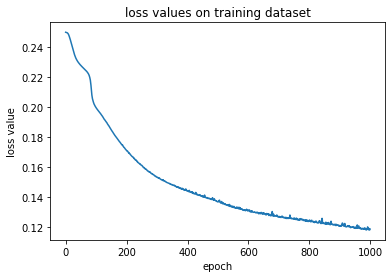

In [144]:
training_loss = rnn.history['loss']
plt.title("loss values on training dataset")
plt.xlabel("epoch")
plt.ylabel("loss value")
plt.plot(training_loss)

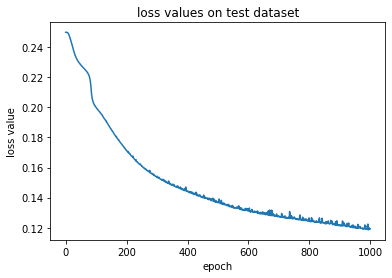

In [145]:
test_loss = rnn.history['val_loss']
plt.title("loss values on test dataset")
plt.xlabel("epoch")
plt.ylabel("loss value")
plt.plot(test_loss)

# Vergleich des Lernerfolgs mit dem MLP der Aufgabe 4.3
das MLP hat nach 1000 Training-Epochen den Loss-Wert von 0,2 <br/>
das RNN hat nach 1000 Training-Epochen den Loss-Wert von 0,11 <br/>
=> das RNN hat eine bessere Performance